# Customer Propensity Modelling

In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

import seaborn as sns

In [25]:
marketing_df = pd.read_csv('./Data/cleaned_marketing_engineered.csv')
marketing_df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Minorshome,TotalMnt,TotalPurchases,TotalCampPar,Age
0,Graduation,Single,58138.0,2012-09-04,58,635.0,88.0,546.0,172.0,88.0,...,0,0,0,0,1,0,1617.0,22,0,55
1,Graduation,Single,46344.0,2014-03-08,38,11.0,1.0,6.0,2.0,1.0,...,0,0,0,0,0,2,27.0,4,0,60
2,Graduation,Married,71613.0,2013-08-21,26,426.0,49.0,127.0,111.0,21.0,...,0,0,0,0,0,0,776.0,20,0,48
3,Graduation,Married,26646.0,2014-02-10,26,11.0,4.0,20.0,10.0,3.0,...,0,0,0,0,0,1,53.0,6,0,30
4,PhD,Married,58293.0,2014-01-19,94,173.0,43.0,118.0,46.0,27.0,...,0,0,0,0,0,1,422.0,14,0,33


In [26]:
marketing_df.Dt_Customer = marketing_df.Dt_Customer.astype('datetime64[ns]')

## Encoding Categorical Variables

In [27]:
marketing_df_modelling = marketing_df.copy()

In [28]:
def ordinal_encoding(categorical_columns, df):
    enc = OrdinalEncoder()
    for column in categorical_columns:    
        required_values = marketing_df_modelling.loc[:, [column]]
        df[column] = enc.fit_transform(required_values)
    return df

In [29]:
marketing_df_modelling = ordinal_encoding(['Education', 'Marital_Status'], marketing_df)

In [33]:
marketing_df_modelling.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [42]:
marketing_df_modelling.drop(columns = ['Dt_Customer'], inplace = True)
X = marketing_df_modelling.drop(['Response'], axis = 1)
y = marketing_df_modelling.Response

In [43]:
y.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [44]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

C:\Users\V_Kartik\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

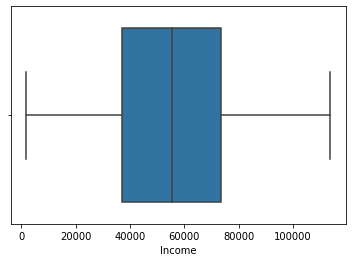

In [52]:
sns.boxplot(X.Income)

## Splitting the Data into training and test data